In [1]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ast
import math

In [2]:
profile_df = pd.read_csv("customer_profiles.csv")
ad_events_df = pd.read_csv("ad_events_wrangled.csv")
ad_details_df = pd.read_csv("ad_details.csv")

In [3]:
# Filter the DataFrame to include only customers who interacted with the specified offer
offer_customers = ad_events_df[(ad_events_df['offer_id'] == "9b98b8c7a33c4b65b9aebfe6a799e6d9") & (ad_events_df['event'] == 'offer completed')]['customer'].unique()

# Create a DataFrame of customer profiles for the offer customers
offer_customer_profiles_df = profile_df[profile_df['id'].isin(offer_customers)]
offer_customer_profiles_df.describe()

,age,became_member_on (year month day),income,kids
count,3627.000000,3.627000e+03,3627.000000,3627.000000
mean,55.235181,2.016521e+07,68095.671354,1.703060
std,16.788983,1.144379e+04,21660.926884,1.482867
min,18.000000,2.013073e+07,30000.000000,0.000000
25%,44.000000,2.016032e+07,52000.000000,0.000000
50%,56.000000,2.017031e+07,67000.000000,2.000000
75%,67.000000,2.017111e+07,83500.000000,3.000000
max,101.000000,2.018073e+07,120000.000000,5.000000


In [4]:
encodedGender = []
for i in range(len(offer_customer_profiles_df)):
    if offer_customer_profiles_df.iloc[i]["gender"] == "M":
        encodedGender.append(1)
    else:
        encodedGender.append(0)

offer_customer_profiles_df["Encoded Gender"] = encodedGender

encodedEverMarried = []
for i in range(len(offer_customer_profiles_df)):
    if offer_customer_profiles_df.iloc[i]["ever_married"] == "Yes":
        encodedEverMarried.append(1)
    else:
        encodedEverMarried.append(0)

offer_customer_profiles_df["Encoded Married"] = encodedEverMarried

offer_customer_profiles_df.drop(["gender"], axis=1, inplace = True)
offer_customer_profiles_df.drop(["ever_married"], axis=1, inplace = True)
offer_customer_profiles_df.drop(["home_state"], axis=1, inplace = True)
offer_customer_profiles_df.drop(["id"], axis=1, inplace = True)


C:\Users\greyes11\AppData\Local\Temp\ipykernel_10100\217920204.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  offer_customer_profiles_df["Encoded Gender"] = encodedGender
C:\Users\greyes11\AppData\Local\Temp\ipykernel_10100\217920204.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  offer_customer_profiles_df["Encoded Married"] = encodedEverMarried
C:\Users\greyes11\AppData\Local\Temp\ipykernel_10100\217920204.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [5]:
dbscan = DBSCAN(eps=20, min_samples=4)

In [6]:
dbscan.fit(offer_customer_profiles_df)

DBSCAN(eps=20, min_samples=4)

In [7]:
predictions = dbscan.fit_predict(offer_customer_profiles_df)

In [8]:
offer_customer_profiles_df["Clusters"] = predictions

C:\Users\greyes11\AppData\Local\Temp\ipykernel_10100\2919820591.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  offer_customer_profiles_df["Clusters"] = predictions


In [9]:
offer_customer_profiles_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3627 entries, 0 to 14823
Data columns (total 7 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   age                                3627 non-null   int64  
 1   became_member_on (year month day)  3627 non-null   int64  
 2   income                             3627 non-null   float64
 3   kids                               3627 non-null   int64  
 4   Encoded Gender                     3627 non-null   int64  
 5   Encoded Married                    3627 non-null   int64  
 6   Clusters                           3627 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 226.7 KB


<AxesSubplot:xlabel='age', ylabel='income'>

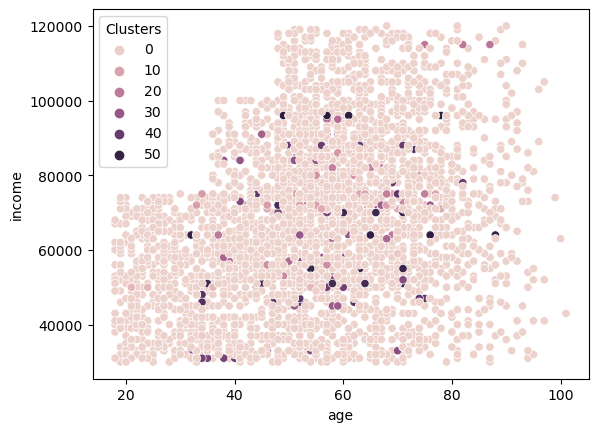

In [10]:
sns.scatterplot(data=offer_customer_profiles_df, x="age", y="income", hue="Clusters")

In [11]:
sScore = silhouette_score(offer_customer_profiles_df, predictions)

In [12]:
sScore

-0.72382108913448